<a href="https://colab.research.google.com/github/Busra-Gumustas/data-analysis-projects/blob/main/COV%C4%B0D_19_turkiye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

In [ ]:
plt.style.use('ggplot') #matplotlib stili için

In [ ]:
from google.colab import files
uploaded = files.upload()  # Bu, dosya yükleme penceresi açacaktır.

veri_oku_covid = pd.read_csv("covid_data.csv")

Saving covid_data.csv to covid_data (2).csv


In [ ]:
print(veri_oku_covid.index)


RangeIndex(start=0, stop=161, step=1)


In [ ]:
veri_oku_covid['date'] = pd.to_datetime(veri_oku_covid['date'], format='%d-%m-%Y', errors='coerce')


In [ ]:
veri_oku_covid.head(10)

,date,test,case,death,recovered
0,NaT,0,5,NaN,NaN
1,NaT,0,6,NaN,NaN
2,NaT,0,7,NaN,NaN
3,NaT,0,31,NaN,NaN
4,NaT,0,49,1.0,NaN
5,NaT,0,93,1.0,NaN
6,NaT,1981,168,2.0,NaN
7,NaT,3656,311,5.0,NaN
8,NaT,2970,277,12.0,NaN
9,NaT,1738,289,9.0,NaN


In [ ]:
 # Veri sütunlarının özelliklerinin görüntülenmesi   bu kısım yok kitapta
 veri_oku_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       0 non-null      datetime64[ns]
 1   test       161 non-null    int64         
 2   case       161 non-null    int64         
 3   death      157 non-null    float64       
 4   recovered  148 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.4 KB


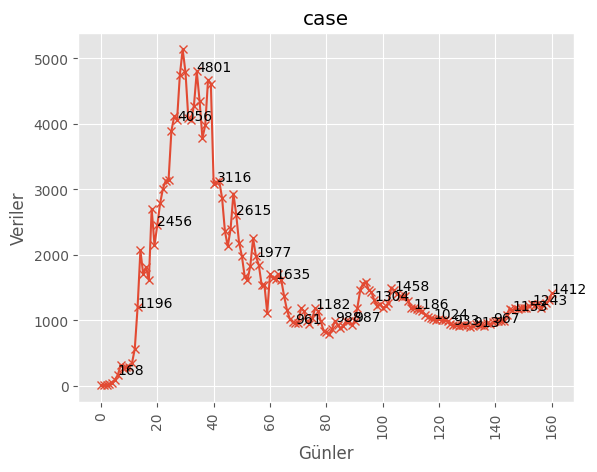

In [ ]:
x_axis =veri_oku_covid.index.values
y_axis=veri_oku_covid['case'].values
plt.plot(x_axis,y_axis, label='case', marker='x')
plt.title('case')
plt.xlabel('Günler')
plt.ylabel('Veriler')
plt.xticks(rotation=90)
counter= 0
for j, k in zip(x_axis, y_axis):
    counter +=1
    if counter %7 ==0:
      plt.annotate(str(k), xy= (j,k))


In [ ]:
veri_oku_covid_shifted= veri_oku_covid.iloc[9:, :]

In [ ]:
veri_oku_covid_shifted.head()

,date,test,case,death,recovered
9,NaT,1738,289,9.0,NaN
10,NaT,3672,293,7.0,NaN
11,NaT,3952,343,7.0,26.0
12,NaT,5035,561,15.0,NaN
13,NaT,7286,1196,16.0,NaN


In [ ]:
veri_oku_covid_shifted.describe()

,date,test,case,death,recovered
count,0,152.000000,152.000000,152.000000,148.000000
mean,NaT,42677.782895,1668.236842,39.717105,1586.466216
min,NaT,1738.000000,289.000000,7.000000,16.000000
25%,NaT,33254.750000,988.750000,18.000000,991.250000
50%,NaT,40731.500000,1204.000000,22.000000,1207.000000
75%,NaT,47621.000000,1819.250000,55.500000,1672.000000
max,NaT,493002.000000,5138.000000,127.000000,5231.000000
std,NaN,39899.002952,1070.803639,33.061536,1212.306445


In [ ]:
# Tarih sütunu varsa (örneğin 'date'), bunu veri kümesinden geçici olarak çıkarın:
veri_oku_covid_shifted_numeric = veri_oku_covid_shifted.select_dtypes(include=[np.number])  # Sadece sayısal sütunlar

# MinMaxScaler ile ölçeklendirme:
scaler = MinMaxScaler()
veri_oku_covid_scaled = pd.DataFrame(
    scaler.fit_transform(veri_oku_covid_shifted_numeric),
    columns=veri_oku_covid_shifted_numeric.columns
)

# Tarih bilgisi varsa, yeniden ekleyin:
veri_oku_covid_scaled.index = veri_oku_covid_shifted.index  # Orijinal index'i geri ekle





In [ ]:
# Sonuç:
print(veri_oku_covid_scaled.head())

        test      case     death  recovered
9   0.000000  0.000000  0.016667        NaN
10  0.003937  0.000825  0.000000        NaN
11  0.004507  0.011136  0.000000   0.001918
12  0.006711  0.056094  0.066667        NaN
13  0.011293  0.187049  0.075000        NaN


In [ ]:
corr= veri_oku_covid_scaled.corr()
corr

,test,case,death,recovered
test,1.000000,-0.120243,-0.142584,0.034344
case,-0.120243,1.000000,0.901870,0.003536
death,-0.142584,0.901870,1.000000,0.282252
recovered,0.034344,0.003536,0.282252,1.000000


<Axes: >

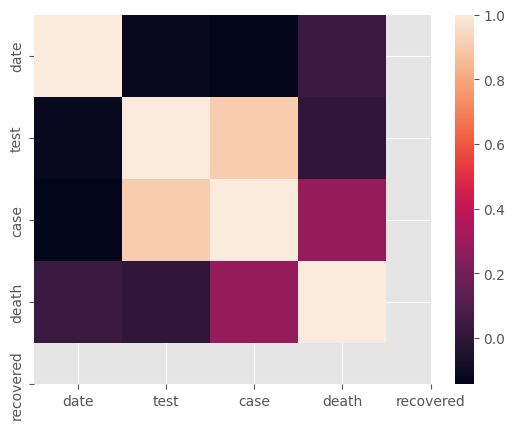

In [ ]:
heatmap(corr, xticklabels=veri_oku_covid.columns, yticklabels=veri_oku_covid.columns)

In [ ]:
print(veri_oku_covid_scaled.columns)
print(veri_oku_covid_scaled.shape)#yok


Index(['test', 'case', 'death', 'recovered'], dtype='object')
(152, 4)


In [ ]:
#eksik verileri kaldırma   yok
X = X.dropna()
y = y.loc[X.index]  # X'teki değişikliklere uygun olarak y'yi güncellemek önemli


NameError: name 'X' is not defined

In [ ]:
print(X.isna().sum())  # X'teki eksik değerlerin sayısını kontrol eder   yok
print(y.isna().sum())  # y'deki eksik değerlerin sayısını kontrol eder


NameError: name 'X' is not defined

In [ ]:
# mlp = MLPRegressor(hidden_layer_sizes=(75,), max_iter=100000, learning_rate_init=0.001)
# mlp.fit(X.values, y.values)
# #verileri eğitmek

NameError: name 'X' is not defined

In [ ]:
mlp =MLPRegressor(hidden_layer_sizes=(75,), max_iter=100000, learning_rate_init=0.5,  #bu kısım var
                  random_state=42)
mlp.fit(X.values, y.values )

NameError: name 'X' is not defined

In [ ]:
y_predicted= mlp.predict(X.values)#var

NameError: name 'X' is not defined

In [ ]:
mean_squared_error(y.values, y_predicted)#var

NameError: name 'y' is not defined

In [ ]:
r2_score(y.values, y_predicted)#var

-0.22962205604535735

In [ ]:
mlp.coefs_[1].round(2)#var

array([[ 2.76,  3.16],
       [-2.24, -1.93],
       [ 0.  , -0.02],
       [ 1.22, -0.59],
       [ 2.89,  2.71],
       [-2.08, -2.25],
       [ 2.63,  2.97],
       [ 2.72,  3.12],
       [ 2.  ,  2.12],
       [ 2.83,  2.59],
       [ 2.07,  1.07],
       [-1.98, -1.8 ],
       [-2.04, -2.18],
       [ 2.83,  3.09],
       [ 0.01,  0.01],
       [-2.2 , -1.83],
       [-2.1 , -2.08],
       [-0.02,  0.01],
       [ 0.04, -0.  ],
       [-2.23, -1.86],
       [-2.1 , -1.96],
       [-0.01, -0.  ],
       [ 2.31,  0.02],
       [ 2.28,  2.29],
       [-2.  , -2.09],
       [-0.  , -0.02],
       [-2.15, -1.96],
       [ 2.29,  2.29],
       [ 2.81,  2.82],
       [ 1.43,  0.91],
       [ 1.28,  0.54],
       [ 0.  ,  0.02],
       [-2.12, -2.35],
       [ 2.64,  3.06],
       [-1.92, -1.84],
       [-2.22, -2.93],
       [ 2.74,  2.88],
       [ 2.67,  2.64],
       [-2.22, -2.05],
       [ 0.  , -0.02],
       [ 0.04,  0.  ],
       [ 2.8 ,  3.06],
       [ 2.77,  2.84],
       [ 2.

In [ ]:
mlp.intercepts_#var

[array([-2.6714883 , -2.28739276, -0.19825183, -2.89168261, -2.62822082,
        -2.37508225, -2.8033239 , -2.7533624 , -2.6192821 , -2.77200502,
         1.00075   , -2.0837825 , -2.14653056, -2.87942807, -0.22873734,
        -1.94994504, -2.29514095, -0.17501375, -0.25638089, -2.08585334,
        -2.07061731, -0.26988444, -2.89253938, -2.62552773, -2.12419934,
        -0.18179814, -2.05723274, -2.53607304, -2.65559403, -3.10153045,
        -0.88895671, -0.21579407, -2.01622056, -2.68876023, -1.55361409,
        -2.62060817, -2.72231897, -2.86860733, -2.15767123, -0.14412142,
        -0.22716687, -2.67765251, -2.67587052, -2.82511626, -2.56251942,
        -2.29754819, -2.77327497, -2.67771778, -1.96003389, -2.74316518,
        -2.10549303, -0.23217072, -3.08824337, -2.92797526, -2.84000669,
        -0.27401064, -0.22249466, -2.80814116, -0.27631943, -3.08858464,
        -2.14756249, -2.7922923 , -2.10016106, -0.15393783, -2.78096658,
        -3.0459831 , -2.64200198, -2.05980813, -2.1

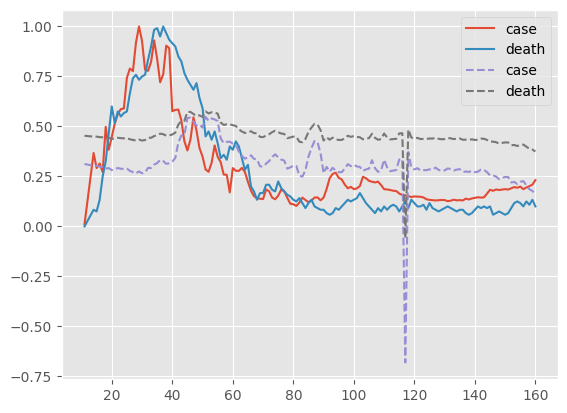

In [ ]:
ax= y.plot(linestyle="-")
pd.DataFrame(y_predicted, columns=y.columns, index=y.index).plot(ax=ax, linestyle="--")
plt.legend()